<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# List of columns to handle
columns_to_fill = ['Employment', 'JobSat', 'RemoteWork']

# Loop through the columns and fill missing values with the mode
for col in columns_to_fill:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Verify that the missing values have been filled
print(df[columns_to_fill].isnull().sum())

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4888\1155050859.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4888\927896029.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_exp = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


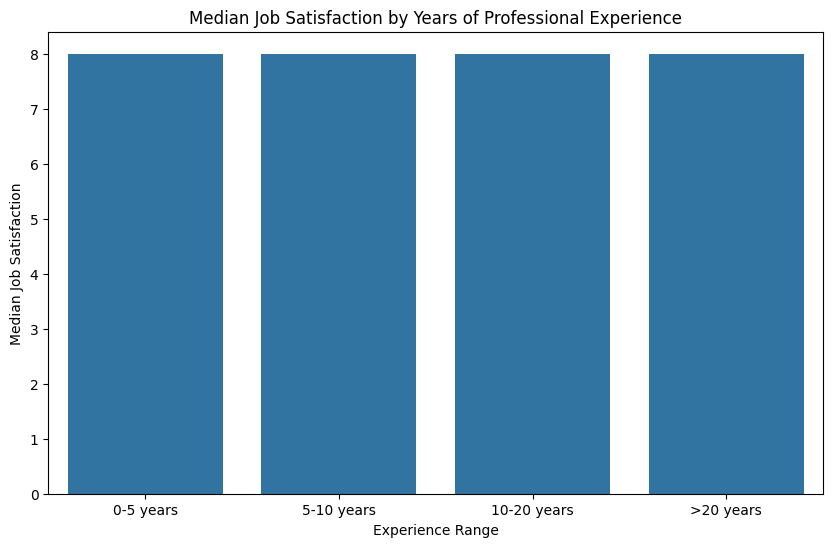

In [5]:
## Write your code here
# Convert 'YearsCodePro' to a numeric type, forcing errors into NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define the bins and labels for the experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# Create the 'ExperienceRange' column
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate the median job satisfaction for each range
median_jobsat_by_exp = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=median_jobsat_by_exp, x='ExperienceRange', y='JobSat')
plt.title('Median Job Satisfaction by Years of Professional Experience')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


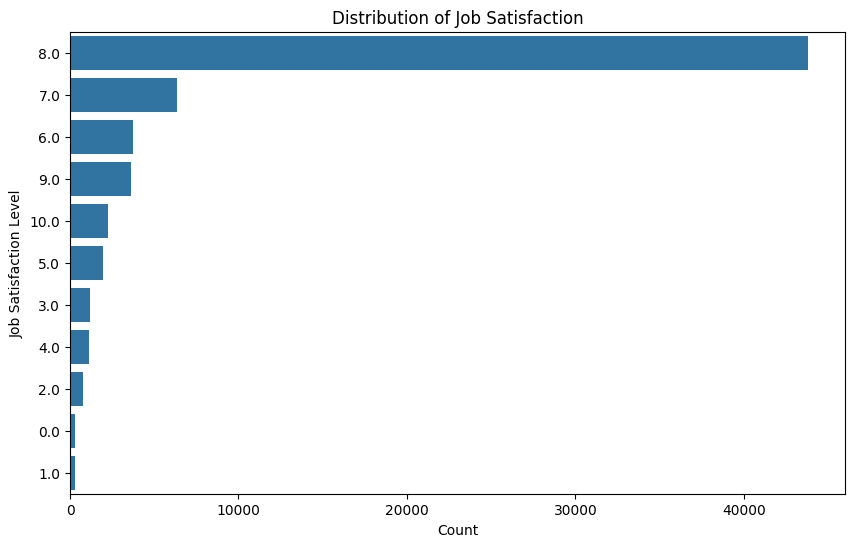

In [6]:
## Write your code here
# Create a count plot for 'JobSat'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='JobSat', order = df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Count')
plt.ylabel('Job Satisfaction Level')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


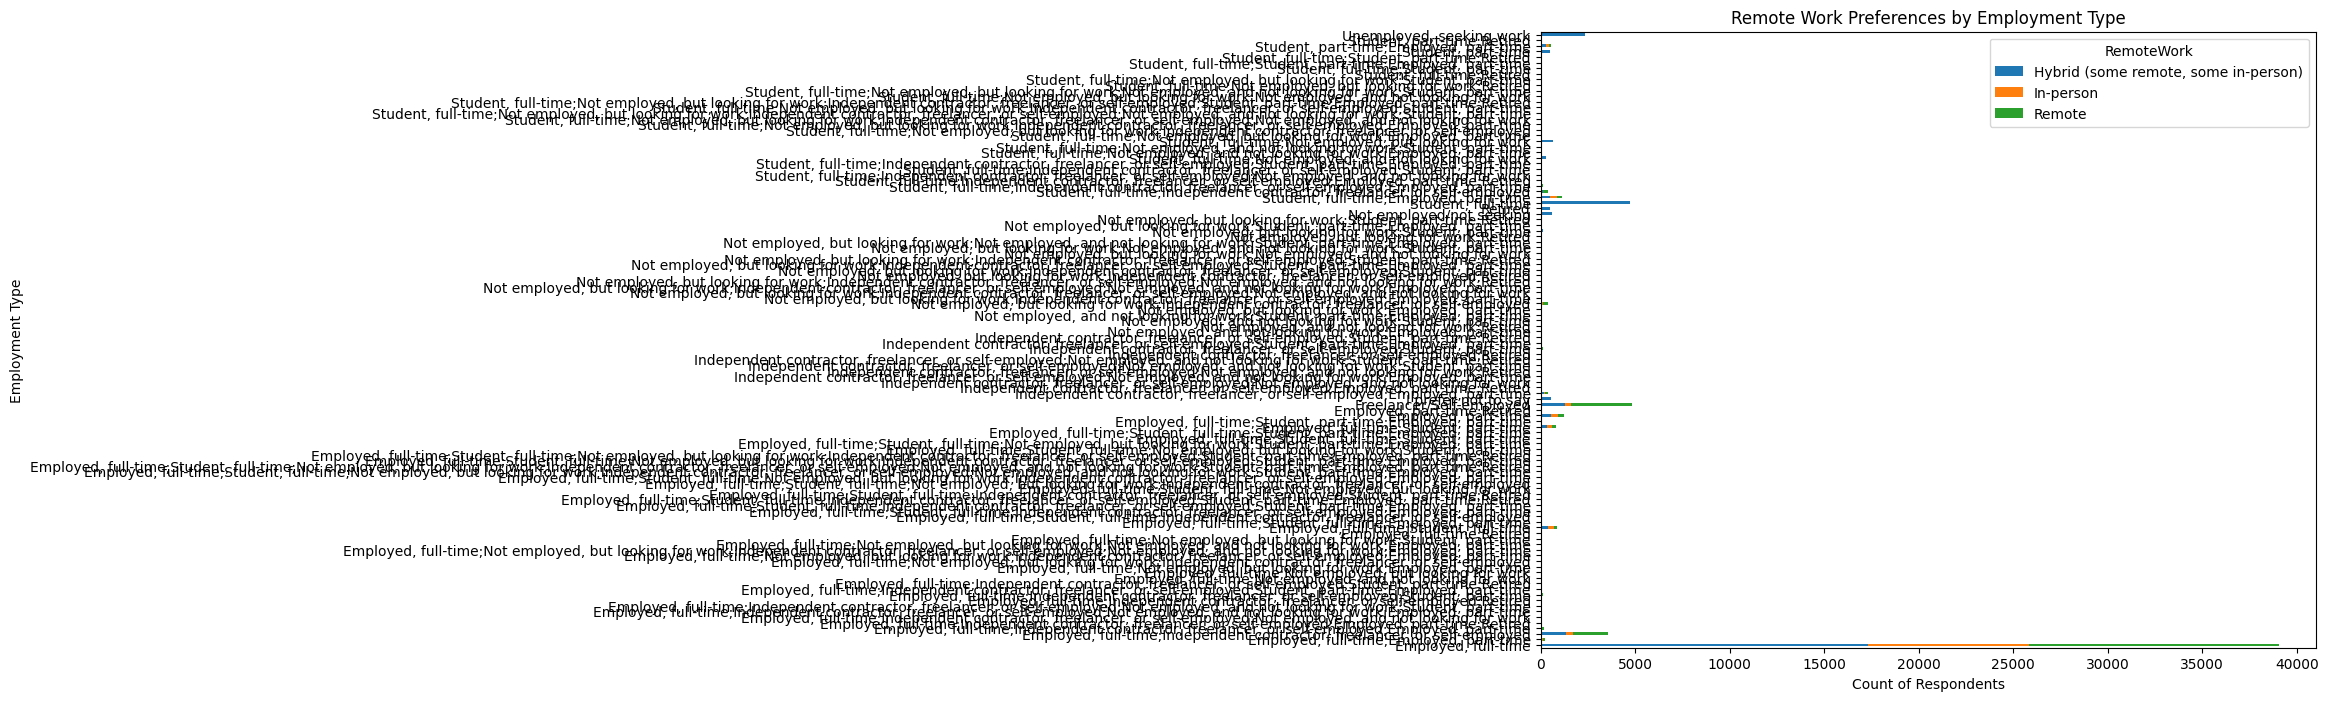

In [ ]:
## Write your code here
# Create a copy to work on so you don't alter the original DataFrame
df_viz = df.copy()

# Define a mapping to shorten the long labels
label_mapping = {
    'Independent contractor, freelancer, or self-employed': 'Freelancer/Self-employed',
    'Employed, full-time': 'Employed, full-time',
    'Not employed, but looking for work': 'Unemployed, seeking work',
    'Employed, part-time': 'Employed, part-time',
    'Student, full-time': 'Student, full-time',
    'Not employed, and not looking for work': 'Not employed/not seeking',
    'Retired': 'Retired',
    'Student, part-time': 'Student, part-time'
}

# Apply the mapping to the 'Employment' column
df_viz['Employment'] = df_viz['Employment'].replace(label_mapping)

# Create the cross-tabulation with the cleaned data
cross_tab_cleaned = pd.crosstab(df_viz['Employment'], df_viz['RemoteWork'])

# Plot the cleaned data as a horizontal bar chart ✨
cross_tab_cleaned.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Count of Respondents')
plt.ylabel('Employment Type')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


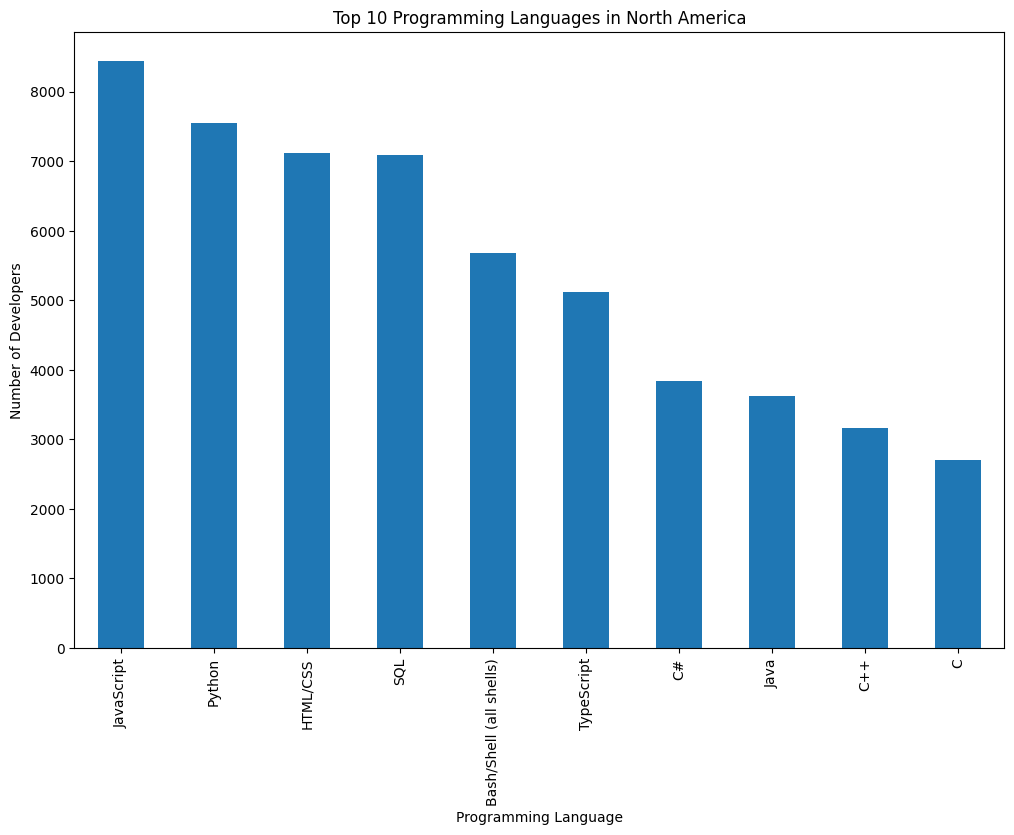

In [10]:
## Write your code here
# Filter data for a specific region, e.g., 'North America'
north_america_df = df[df['Country'].isin(['United States of America', 'Canada', 'Mexico'])]

# Split the 'LanguageHaveWorkedWith' column and count the languages
language_counts = north_america_df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()

# Visualize the top 10 languages
plt.figure(figsize=(12, 8))
language_counts.head(10).plot(kind='bar')
plt.title('Top 10 Programming Languages in North America')
plt.xlabel('Programming Language')
plt.ylabel('Number of Developers')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


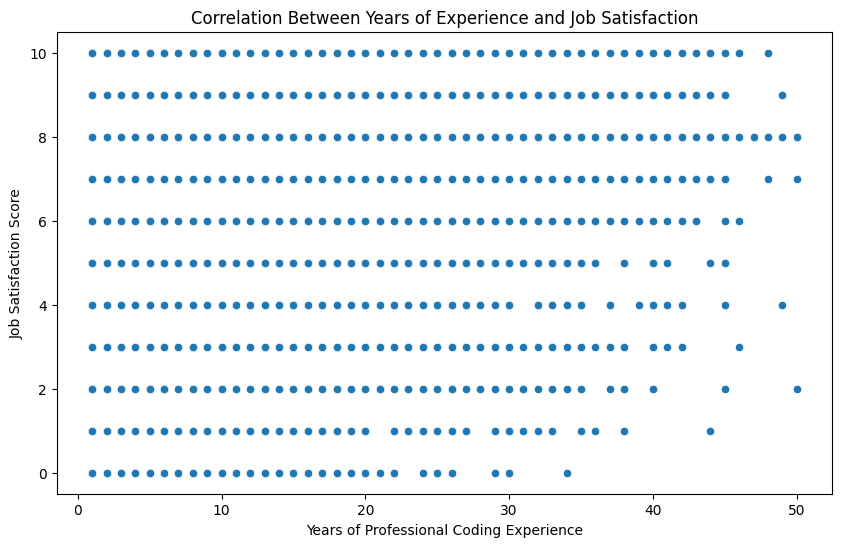

In [11]:
## Write your code here
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSat')
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [15]:
# Create a copy for visualization
df_viz = df.copy()

# Define a mapping to shorten 'Employment' labels
employment_mapping = {
    'Independent contractor, freelancer, or self-employed': 'Freelancer/Self-employed',
    'Not employed, but looking for work': 'Unemployed, seeking work',
    'Employed, full-time': 'Employed, full-time',
    'Employed, part-time': 'Employed, part-time',
    'Student, full-time': 'Student, full-time',
    'Not employed, and not looking for work': 'Not employed/not seeking',
    'Student, part-time': 'Student, part-time'
}

# Define a mapping to shorten 'EdLevel' labels
edlevel_mapping = {
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's degree",
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master's degree",
    'Professional degree (JD, MD, Ph.D., Ed.D., etc.)': 'Professional degree',
    'Some college/university study without earning a degree': 'Some college, no degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree'
}

# Apply both mappings
df_viz['Employment'] = df_viz['Employment'].replace(employment_mapping)
df_viz['EdLevel'] = df_viz['EdLevel'].replace(edlevel_mapping)

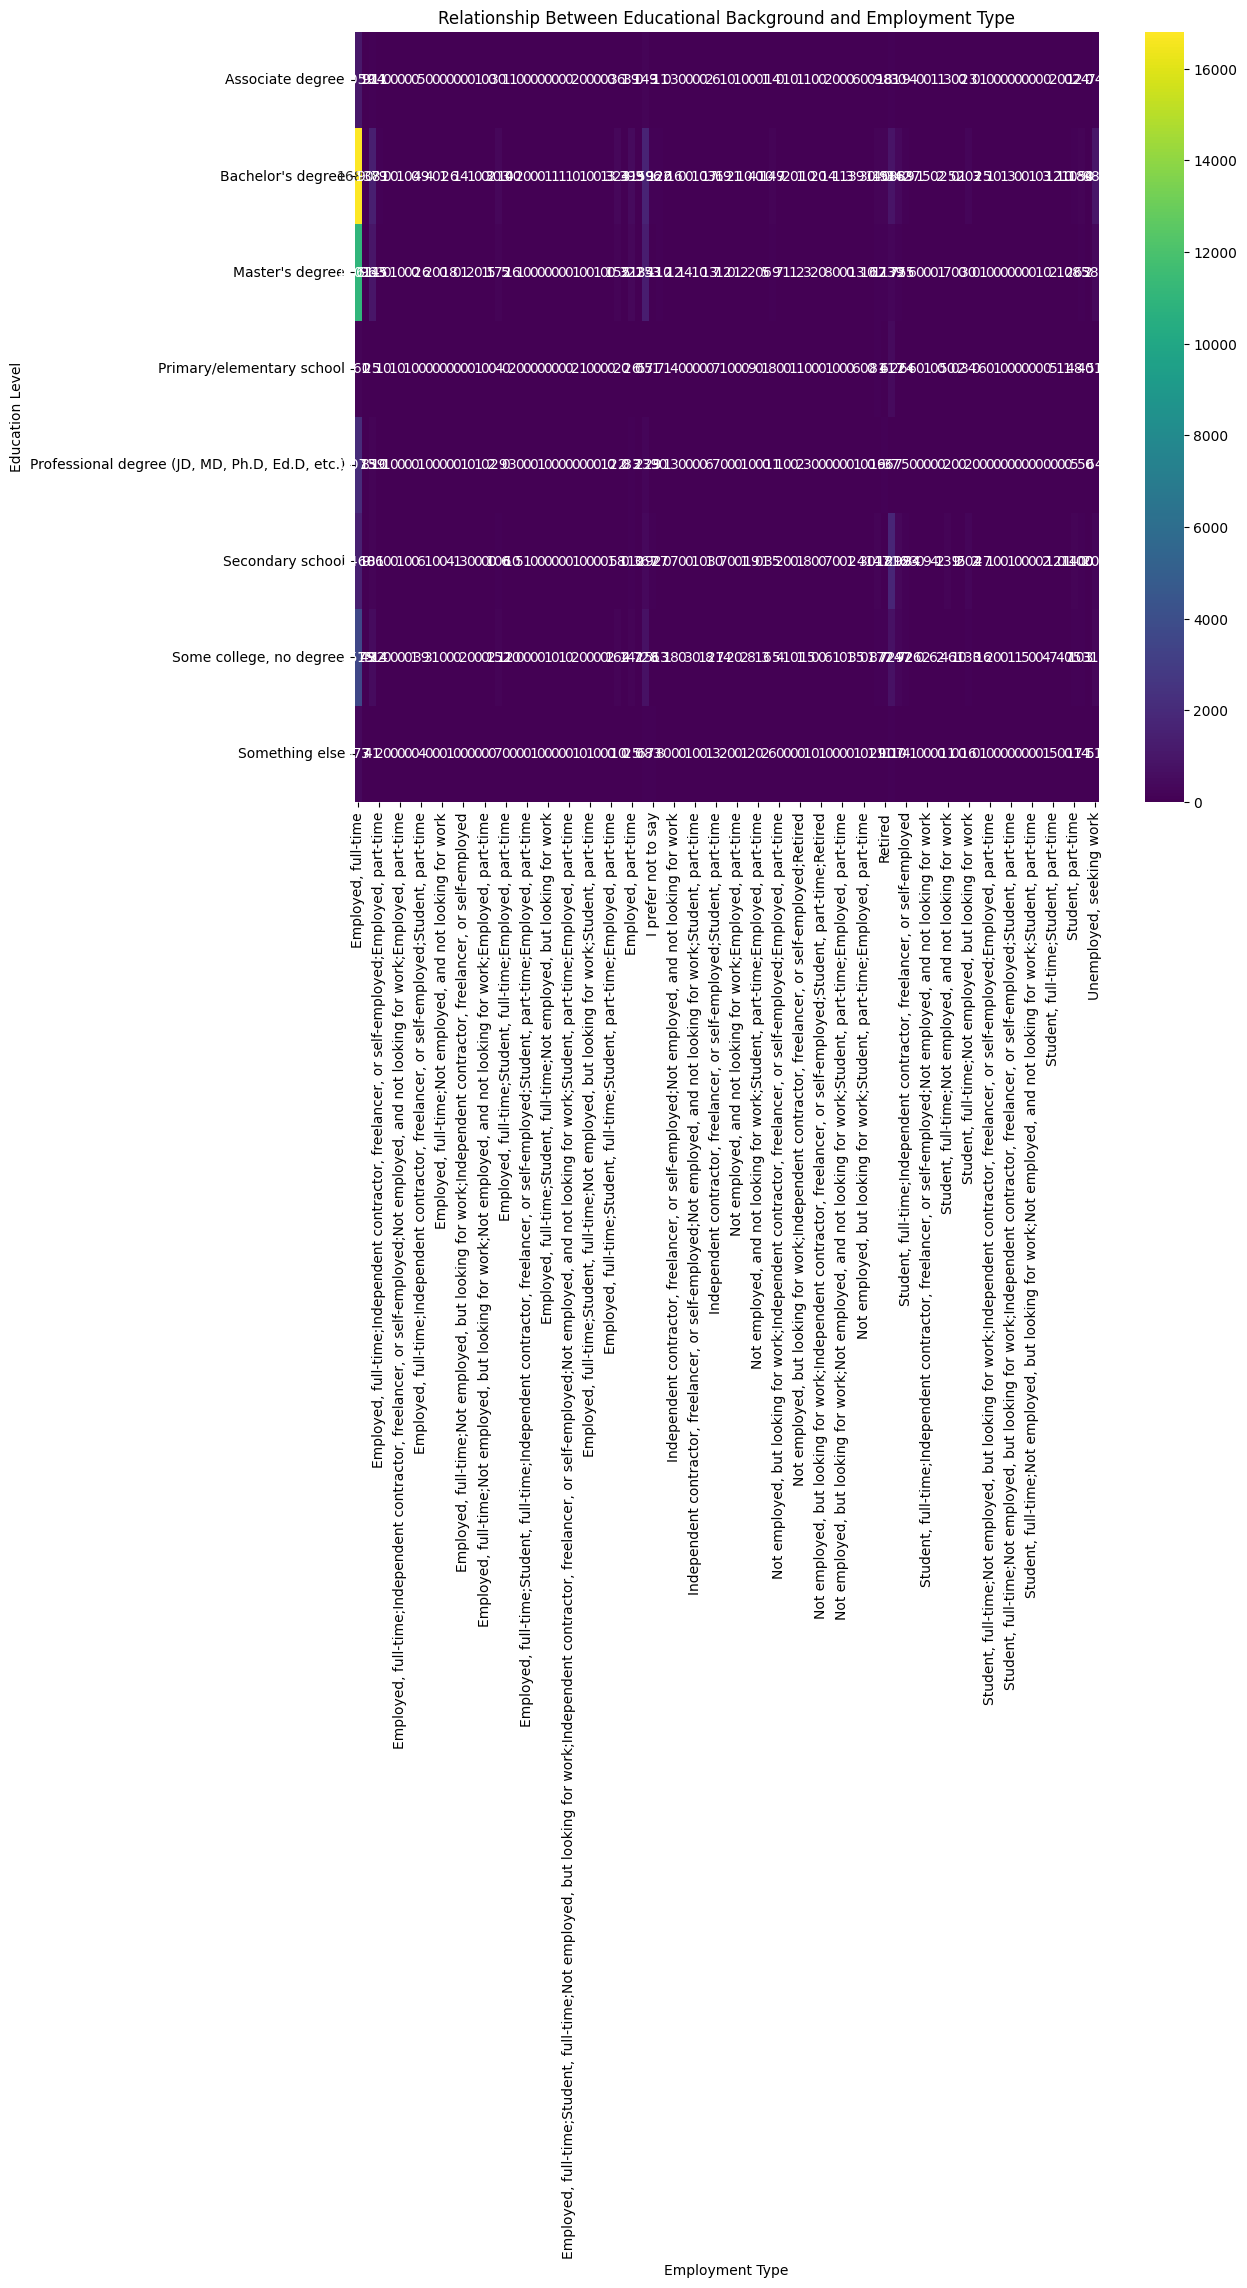

In [16]:
# Create a cross-tabulation with the CLEANED data
edu_emp_crosstab_cleaned = pd.crosstab(df_viz['EdLevel'], df_viz['Employment'])

# Visualize the relationship with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(edu_emp_crosstab_cleaned, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship Between Educational Background and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [17]:
## Write your code here
# Save the modified DataFrame to a new CSV file
df.to_csv('cleaned_and_analyzed_survey_data.csv', index=False)

# Print a confirmation message
print("Dataset saved successfully. ✅")

Dataset saved successfully. ✅


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
